# Streaming
Methods: .stream() and astream()

- These methods are sync and async methods for streaming back results.

Additional parameters in streaming mods for graph state
- values: This streams the full state of the graph after each node is called.
- updates: This streams updates to the state of the graph after each node is called.

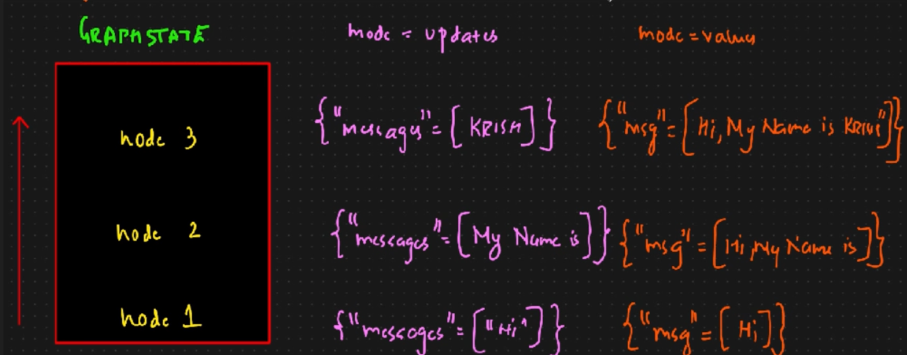

In [1]:
from langchain_groq import ChatGroq

LLM = ChatGroq(model = "llama-3.1-8b-instant")


In [2]:
from pydantic import BaseModel
from typing import Annotated
from langgraph.graph.message import add_messages

class State(BaseModel):
    messages: Annotated[list, add_messages]

In [3]:
def llm_node(state: State):
    return {"messages": [LLM.invoke(state.messages)]}

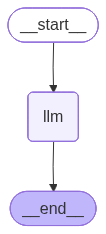

In [4]:
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

builder = StateGraph(State)
builder.add_node('llm', llm_node)

builder.add_edge(START, 'llm')
builder.add_edge('llm', END)

graph = builder.compile(checkpointer=memory)

display(Image(graph.get_graph().draw_mermaid_png()))


In [5]:
config = {
    "configurable": {
        "thread_id": "1",
    }
}

In [6]:
from langchain_core.messages import HumanMessage
from pprint import pprint

user_msg = HumanMessage(content="hi!, whats up!")
msg = graph.invoke({'messages': [user_msg]}, config=config)

for m in msg['messages']: 
    m.pretty_print()

================================ Human Message =================================

hi!, whats up!
================================== Ai Message ==================================

Not much! I'm an AI, so I don't have personal experiences or emotions, but I'm here to help you with any questions or topics you'd like to discuss. How's your day going so far?


# Streaming the response with stream method

In [7]:
# create a thread

config = {
    "configurable": {
        "thread_id": "2"
    }
}

In [8]:
for chunk in graph.stream({'messages': "hi, my name is Boon Sai and I like Anime"}, config=config, stream_mode="updates"):
    print(chunk)

{'llm': {'messages': [AIMessage(content='Nice to meet you, Boon Sai. Anime is a great interest to have. There are so many amazing shows and genres to explore. What kind of anime do you enjoy watching the most? Are you into action-packed shonen, romantic slice-of-life, or something else?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 47, 'total_tokens': 104, 'completion_time': 0.084374781, 'prompt_time': 0.002194188, 'queue_time': 0.045010658, 'total_time': 0.086568969}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_e32974efee', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--b04a354a-6a92-4961-9df1-611072f71d8f-0', usage_metadata={'input_tokens': 47, 'output_tokens': 57, 'total_tokens': 104})]}}


In [9]:
for chunk in graph.stream({'messages': "hi, my name is Boon Sai and I like Anime"}, config=config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='hi, my name is Boon Sai and I like Anime', additional_kwargs={}, response_metadata={}, id='1a54db99-59b9-4ec4-813a-18854dc5947e'), AIMessage(content='Nice to meet you, Boon Sai. Anime is a great interest to have. There are so many amazing shows and genres to explore. What kind of anime do you enjoy watching the most? Are you into action-packed shonen, romantic slice-of-life, or something else?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 47, 'total_tokens': 104, 'completion_time': 0.084374781, 'prompt_time': 0.002194188, 'queue_time': 0.045010658, 'total_time': 0.086568969}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_e32974efee', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--b04a354a-6a92-4961-9df1-611072f71d8f-0', usage_metadata={'input_tokens': 47, 'output_tokens': 57, 'total_tokens': 104}), HumanMessage(content='hi, my name is Boon Sai 

In [10]:
for chunk in graph.stream({'messages': "I also like coding"}, config=config, stream_mode="updates"):
    print(chunk)

{'llm': {'messages': [AIMessage(content="That's awesome, Boon Sai. Coding and anime might seem like unrelated interests, but it's great that you have diverse passions. Many people find that coding and programming can be a good complement to their creative outlets, like anime.\n\nIf you don't mind me asking, what kind of coding do you enjoy? Web development, game development, or something else?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 74, 'prompt_tokens': 165, 'total_tokens': 239, 'completion_time': 0.121685027, 'prompt_time': 0.009114378, 'queue_time': 0.046306542, 'total_time': 0.130799405}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_33e8adf159', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--397835e1-31e4-4de8-82d1-105676580601-0', usage_metadata={'input_tokens': 165, 'output_tokens': 74, 'total_tokens': 239})]}}


In [11]:
for chunk in graph.stream({'messages': "I also like coding"}, config=config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='hi, my name is Boon Sai and I like Anime', additional_kwargs={}, response_metadata={}, id='1a54db99-59b9-4ec4-813a-18854dc5947e'), AIMessage(content='Nice to meet you, Boon Sai. Anime is a great interest to have. There are so many amazing shows and genres to explore. What kind of anime do you enjoy watching the most? Are you into action-packed shonen, romantic slice-of-life, or something else?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 47, 'total_tokens': 104, 'completion_time': 0.084374781, 'prompt_time': 0.002194188, 'queue_time': 0.045010658, 'total_time': 0.086568969}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_e32974efee', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--b04a354a-6a92-4961-9df1-611072f71d8f-0', usage_metadata={'input_tokens': 47, 'output_tokens': 57, 'total_tokens': 104}), HumanMessage(content='hi, my name is Boon Sai 

In [12]:
for chunk in graph.stream({'messages': "I love music"}, config=config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='hi, my name is Boon Sai and I like Anime', additional_kwargs={}, response_metadata={}, id='1a54db99-59b9-4ec4-813a-18854dc5947e'), AIMessage(content='Nice to meet you, Boon Sai. Anime is a great interest to have. There are so many amazing shows and genres to explore. What kind of anime do you enjoy watching the most? Are you into action-packed shonen, romantic slice-of-life, or something else?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 47, 'total_tokens': 104, 'completion_time': 0.084374781, 'prompt_time': 0.002194188, 'queue_time': 0.045010658, 'total_time': 0.086568969}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_e32974efee', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--b04a354a-6a92-4961-9df1-611072f71d8f-0', usage_metadata={'input_tokens': 47, 'output_tokens': 57, 'total_tokens': 104}), HumanMessage(content='hi, my name is Boon Sai 

# Streaming the response with astream method
Streaming tokens we often want to stream more than graph state.

In particular, with chat model calls it is common to stream the tokens as they are generated.

We can do this using the .astream_envents method, which streams back events as they happen inside nodes!

Each even is a dict with a few keys:

- Event: This is the type of event that is being emmitted.
- Name: This is the name of event.
- Data: This is the data associated with the event.
- Metadata: Contains langgraph_node, the node emitting the event.

In [13]:
config = {
    "configurable": {
        "thread_id": "3"
    }
}

In [15]:
async for event in graph.astream_events({"messages": ["Hi my name is Luffy and I like meat."]}, config=config, version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi my name is Luffy and I like meat.']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '39ada1b0-30e5-4d4d-bb54-6bfb8fe2e3e6', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': State(messages=[HumanMessage(content='Hi my name is Luffy and I like meat.', additional_kwargs={}, response_metadata={}, id='82152841-4e40-4c0f-ab03-659743c0927d')])}, 'name': 'llm', 'tags': ['graph:step:3'], 'run_id': 'c38fcf80-b38b-4750-a84b-f3dc0c422f43', 'metadata': {'thread_id': '3', 'langgraph_step': 3, 'langgraph_node': 'llm', 'langgraph_triggers': ('branch:to:llm',), 'langgraph_path': ('__pregel_pull', 'llm'), 'langgraph_checkpoint_ns': 'llm:a4abaeda-add7-2721-6ec8-5d9aa0b98bef'}, 'parent_ids': ['39ada1b0-30e5-4d4d-bb54-6bfb8fe2e3e6']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi my name is Luffy and I like meat.', additional_kwargs={}, response_metadata={